# 基于二手车价格数据集的汽车价格数据分析与预测

## 简介

从
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/
上提供的数据集中分析和可视化二手车价格。

分为四部分：

- 数据处理-pre处理python中的数据 
  - 处理缺失值
  - 数据格式整理
  - 数据规范化
  - 数据分箱
  
- 探索性数据分析
  - 描述性统计
  - 分组
  - 方差分析
  - 相关性分析
  
- 模型建立
    - 简单线性回归
    - 多元线性回归
    
- 模型评估
     - 回归图         
     - 分布图

## 导入相关包

In [0]:
# 导入相关包

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## 获取数据

数据地址：https://archive.ics.uci.edu/ml/datasets/automobile


In [30]:
# 读取数据

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

df = pd.read_csv(url, header = None)
df.head(5)
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [0]:
# 定义表头

headers=["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
        "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
         "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
         "highway-mpg", "price"]
df.columns = headers

In [32]:
# view data types

print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


## 可以导出数据

In [0]:
# Exporting to csv (这条不执行)

path = "D:/cars.csv"
df.to_csv(path)

## 观察数据的总体属性

In [0]:
# 描述性统计

print(df.describe(include="all"))
print(df.info)

## 数据整理

In [0]:
# 将 "?" 替换为 NAN (这条在 colab 上不执行)

df["price"].replace('?',np.nan, inplace = True)
path = "D:/cars.csv"
df.to_csv(path)

In [0]:
## 数据格式整理，将价格数据转换为整数，丢弃缺失数据

df["price"].replace('?', np.nan, inplace = True)
df.dropna(subset=["price"], axis=0, inplace=True)
df["price"] = df["price"].astype("int")

In [0]:
# 继续整理，将 peak-rpm 从因子类型转换为整数类型，丢弃 NaN 值

df["peak-rpm"].replace('?', np.nan, inplace = True)
df.dropna(subset=["peak-rpm"], axis=0, inplace=True)
df["peak-rpm"] = df["peak-rpm"].astype("int")

In [0]:
# 再次观察数据的基本信息

print(df.info)

## 数据分箱

In [0]:
# (这条在 colab 上不执行)

binwidth = int((max(df["price"])-min(df["price"]))/3)
bins = range(min(df["price"]), max(df["price"]), binwidth)
group_names = ['low','medium','high']
df["price-binned"] = pd.cut(df["price"], bins, labels=group_names)
path = "D:/cars.csv"
df.to_csv(path)
df.dropna(subset=["price-binned"], axis=0, inplace=True)

## 数据可视化

In [0]:
# 绘制直方图

plt.hist(df["price"],bins=30)
plt.title("Price Bins")
plt.xlabel("Count")
plt.ylabel("Price")
plt.show()

## 将类别变量转化为定量变量

In [0]:
df = (pd.get_dummies(df["fuel-type"]))

In [0]:
# 驱动轮统计

drive_wheels_counts = df["drive-wheels"].value_counts()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
print(drive_wheels_counts)

## 绘制箱形图

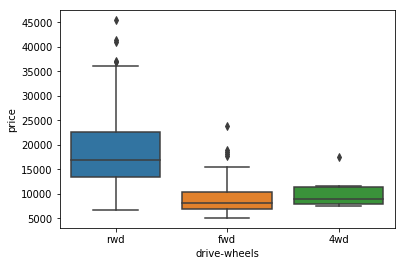

In [42]:
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.show()

## 散点图

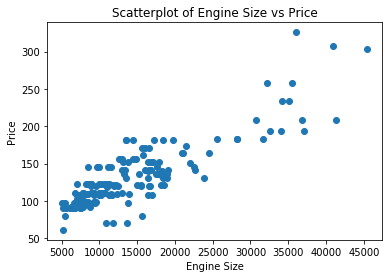

In [43]:
# 散点图 - 汽车价格与发动机尺寸的关系

y=df["engine-size"]
x=df["price"]
plt.scatter(x,y)

plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

## 更高级的作图

In [52]:
# 导入专用的作图包

import plotly
import plotly.graph_objs as go

# 绘制散点图
fig1 = go.Scatter(x=df['curb-weight'],
                  y=df['price'],
                  mode='markers')

# 设置图形
mylayout = go.Layout(xaxis=dict(title="curb-weight"),
                     yaxis=dict( title="price"))

# 作图并导出为 html 格式文档
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
auto_open=True)

'file:///content/temp-plot.html'

绘制成功后，可以在当前工作目录中找到生成的网页文档，下载后可以打开看。

## 三维散点图

In [65]:
# import modules
import plotly
import plotly.graph_objs as go

# make plotly figure
fig2 = go.Scatter3d(x=df['curb-weight'],
                    y=df['price'],
                    z=df['horsepower'],
                    mode='markers')

# make plotly Layout
mylayout = go.Layout(xaxis=dict(title="curb-weight"),
                     yaxis=dict(title="price"),
                     #zaxis=dict(title="horsepower")
                    )

# plot and save html
plotly.offline.plot({"data": [fig2], 
                     "layout": mylayout},
                    auto_open=True)

'file:///content/temp-plot.html'

## 数据分组分析

In [44]:
# 数据分组

df_test = df[["drive-wheels", "body-style", "price"]]
df_group = df_test.groupby(['drive-wheels', 'body-style'], as_index = False).mean()

# 数据透视表 - 基于驱动轮和车身类型的价格透视

df_pivot = df_group.pivot(index = 'drive-wheels', columns= 'body-style')
print(df_pivot)

                   price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000  10061.181818
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]


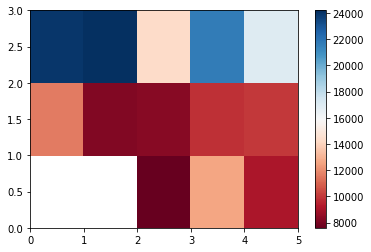

In [45]:
# 热力图

plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

## 相关性分析

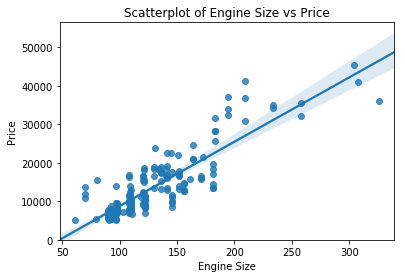

In [46]:
# 相关性分析 - 发动机尺寸与价格的线性关系

sns.regplot(x='engine-size', y='price', data=df)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.ylim(0,)
plt.show()

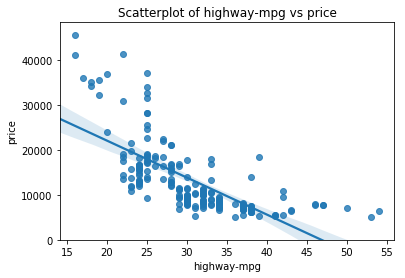

In [47]:
# 相关性分析 - 高速公路 MPG 与 汽车价格的负相关关系

sns.regplot(x='highway-mpg', y='price', data=df)
plt.title("Scatterplot of highway-mpg vs price")
plt.xlabel("highway-mpg")
plt.ylabel("price")
plt.ylim(0,)
plt.show()

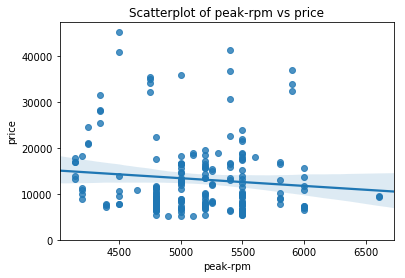

In [48]:
# 弱线性相关 - 发动机瞬时转速与价格的关系

sns.regplot(x='peak-rpm', y='price', data=df)
plt.title("Scatterplot of peak-rpm vs price")
plt.xlabel("peak-rpm")
plt.ylabel("price")
plt.ylim(0,)
plt.show()

## 简单的线性回归拟合结果

In [0]:
lm = LinearRegression()
X=df[["highway-mpg"]]
Y=df["price"]
lm.fit(X,Y)
Yhat1 = lm.predict(X)
b0 = lm.intercept_
b1 = lm.coef_
estimated = b0 + b1*X

ax1 = sns.distplot(df["price"],hist = False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist = False, color="b", label="Fitted Value", ax=ax1)
plt.ylim(0,)
plt.show()


## 多元线性回归

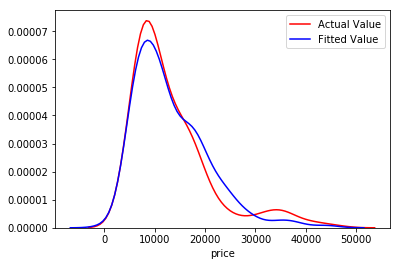

In [49]:
# 多元线性回归 - Multiple Linear Regression with Distribution plot

lm = LinearRegression()
Z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
Y=df["price"]
lm.fit(Z,Y)
Y=df["price"]
Yhat2 = lm.predict(Z)

ax1 = sns.distplot(df["price"],hist = False, color="r", label="Actual Value")
sns.distplot(Yhat2, hist = False, color="b", label="Fitted Value", ax=ax1)
plt.ylim(0,)
plt.show()